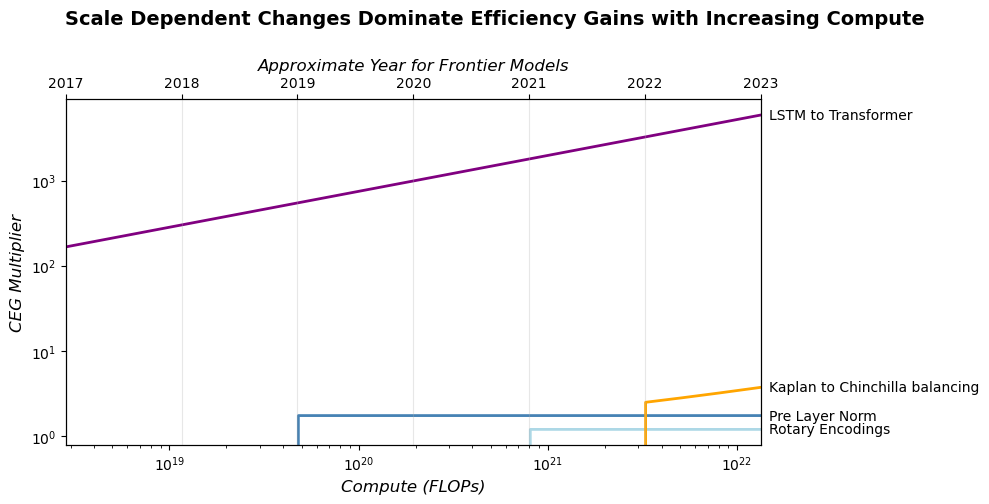

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def year_to_compute(year, y0=2013, C0=1e16, k=np.log(4.1)):
    return C0 * np.exp(k * (year - y0))

def compute_to_year(C, y0=2013, C0=1e16, k=np.log(4.1)):
    return y0 + np.log(C / C0) / k

C_2017 = year_to_compute(2017)
C_2019 = year_to_compute(2019)
C_2021 = year_to_compute(2021)
C_2022 = year_to_compute(2022)
C_2023 = year_to_compute(2023)

C = np.logspace(18, 25, 1000)
years = compute_to_year(C)

mask = (C >= C_2017) & (C <= C_2023)
C = C[mask]
years = years[mask]

rotary = np.where(C >= C_2021, 1.19, 0)
pre_layer_norm = np.where(C >= C_2019, 1.73, 0)

lstm_to_transformer = (((8.06/3.55) * C**(-0.091))**(1/-0.064)) / C
M_C_base = (1.85e-20) * C * (28737.9 * C**(-0.2482) + 20.337 * C**(-0.0756))**6.51
M_C = np.where(C >= C_2022, M_C_base, 0)

plt.figure(figsize=(10, 5))
plt.plot(C, rotary, linewidth=2, color='lightblue')
plt.plot(C, pre_layer_norm, linewidth=2, color='steelblue')
plt.plot(C, lstm_to_transformer, linewidth=2, color='purple')
plt.plot(C, M_C, linewidth=2, color='orange')

plt.xscale('log')
plt.yscale('log')
plt.xlim(C_2017, C_2023)
plt.xlabel('Compute (FLOPs)', fontsize=12, fontstyle='italic')
plt.ylabel('CEG Multiplier', fontsize=12, fontstyle='italic')

ax1 = plt.gca()
ax2 = ax1.twiny()
year_ticks = np.arange(2017, 2024)
compute_values = [year_to_compute(y) for y in year_ticks]
ax2.set_xscale('log')
ax2.set_xlim(C_2017, C_2023)
ax2.set_xticks(compute_values)
ax2.set_xticklabels(year_ticks)
ax2.set_xlabel('Approximate Year for Frontier Models', fontsize=12, fontstyle='italic')
ax2.minorticks_off()

plt.grid(True, alpha=0.3)

label_size = 10

plt.text(C[-1] * 1.1, rotary[-1], 'Rotary Encodings', va='center', fontsize=label_size)
plt.text(C[-1] * 1.1, pre_layer_norm[-1], 'Pre Layer Norm', va='center', fontsize=label_size)
plt.text(C[-1] * 1.1, lstm_to_transformer[-1], 'LSTM to Transformer', va='center', fontsize=label_size)
plt.text(C[-1] * 1.1, M_C[-1], 'Kaplan to Chinchilla balancing', va='center', fontsize=label_size)

plt.suptitle(
    'Scale Dependent Changes Dominate Efficiency Gains with Increasing Compute',
    fontsize=14,
    y=1.00,
    fontweight = 'bold'
)

plt.tight_layout()
plt.show()

In [4]:
compute_values

[6.892099999999999e+17,
 2.8257609999999995e+18,
 1.1585620099999996e+19,
 4.750104240999998e+19,
 1.947542738809999e+20,
 7.984925229120995e+20,
 3.273819343939608e+21,
 1.342265931015239e+22,
 5.50329031716248e+22,
 2.2563490300366165e+23]